# ODE's
### Explicit Solution: Euler Step
Take the simplest, first order ODE
$$
y^\prime = f(y,x)
$$
where the right-hand side (RHS) is the function $f(y,x)$ that specifies the derivative $y^\prime = \frac{dy}{dx}$. We are looking for the function $y(x)$, but here not the algebraic expression but the numerical values. For a time dependent problem $x = t$. 
***
Take for example $f (y,x) = 2x$, then we know that $y(x) = x^2$. Let's pretend we do not know the answer, but the initial conditions $y(0) = 0$. How can we numerically calculate $y(x)$ for a series of discrete values $x_i$?
***
The differential equation is

$$\frac{dy}{dx} = 2x $$ and we need to turn that into a difference equation:

$$\frac{y_\mathrm{n+1} - y_\mathrm{n}}{x_\mathrm{n+1} - x_\mathrm{n}} = 2 x_\mathrm{n}$$

which we solve for $y_\mathrm{n+1}$:

$$y_\mathrm{n+1} = y_\mathrm{n} + 2 h x_\mathrm{n}$$ where $h= x_\mathrm{n+1} - x_\mathrm{n}$
***

In [1]:
y = [0]; x = [0]

rhs_f = lambda x: 2*x
x_thing = x[0]; y_thing = y[0]

h = 2.; x_end = 4.

while (x_thing <= x_end+h):
    y_thing = y_thing + h*rhs_f(x_thing)
    x_thing += h
    print(x_thing, y_thing)
    x.append(x_thing); y.append(y_thing)
    

2.0 0.0
4.0 8.0
6.0 24.0
8.0 48.0


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


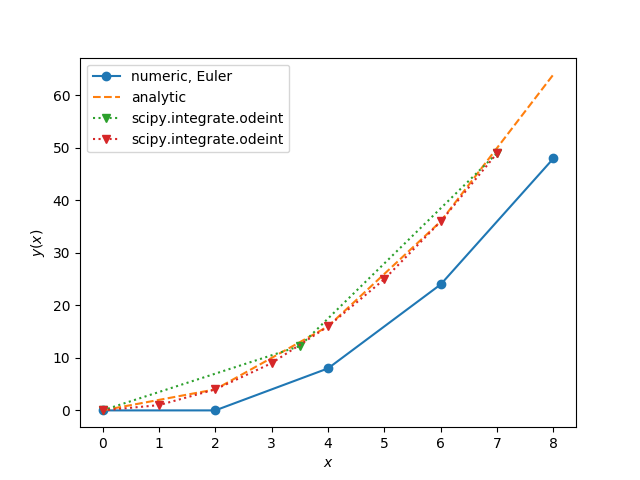

(<matplotlib.text.Text at 0x7f56f9fcc898>,
 <matplotlib.text.Text at 0x7f56f9fd4f60>)

In [3]:
%pylab nbagg
figure(1)
plot(x, y, 'o-', label='numeric, Euler')
plot(x, array(x)**2, '--', label='analytic')
legend()
xlabel('$x$'), ylabel('$y(x)$')

This is the simplest way of integrating an ODE, and it is called the _Euler step_. A simple multiplication of $\Delta x$ with the RHS which represents the derivatiev of the sought function $y(x)$. 

## Solution using ODE solver library

In [4]:
from scipy import integrate

In [5]:
integrate.odeint?

In [11]:
rhs_ff = lambda y, x: 2*x
x = linspace(0, 7, 8)
x0 = 0

In [12]:
yy = integrate.odeint(rhs_ff, x0, x)

In [13]:
figure(1)
plot(x, yy, 'v:', label='scipy.integrate.odeint')
legend()

## Skydiver Problem: Falling body with Drag
What is the terminal velocity of the sky diver? This will depend on the balance of two forces: the gravitational force and the drag force that describes the air resistance
***
### Equation of motion
The equation of motion for the velocity is $v = a t +v_0$ where $a$ is the acceration and $v_0$ the initial velocity. But this is of course just a special case of the more general case
$$\frac{d\vec{p}}{dt} = \sum \vec{F}_i .$$
where $\vec{p}$ is the momentum and $\vec{F}_i$ is one of several forces that may act, like gravitational force and friction.
### Forces
We will consider a 1D motion in the vertical direction, and therefore consider the scalar equations.

#### Gravity

$$F = - m g$$
where $m$ is the mass of the body and $g$ is the magnitude of the gravitational acceleration.

#### Air drag

In order to obtain an idea of what a formula for the air drag could be we use dimensional analysis. This method is based on the principle that every physics equation must be dimensionally homogeneous, i.e. the units on each side of the equation must be the same. We are looking for a force, which has the unit 
$$ [F] = \frac{ML}{T^2}$$
where $M$, $L$ and $T$ stand for the mass, length and time unit. We then consider what the drag force could possibly depend on. This consideration is where the physics happens. We expect that the drag force will somehow depend on the following:

- density $\rho$ of medium through which object is moving, in this case air
- velocity $v$
- cross section of object $A$

We are looking for an expression of the type
$$F = C_D \rho^a v^b A^c$$ 
where $C_D$ is a dimensionless coefficient and $a$, $b$ and $c$ are derived from the condition that unit of $F$ has to come out correctly. You can easily confirm that this is the case if $a=1$, $b=2$ and $c=1.$ Convention has it that we throw in another factor $\frac{1}{2}$ and the  resulting expression for the drag force is 

$$F_D = \frac{1}{2} C_D \rho v^2 A.$$ 

### Drag coefficient

A number of hydrodynamic processes contributed to the total drag of a an object. Which of these will dominate will depend on the flow regime. Flow regimes in hydrodynamics are characterized by dimensionless numbers. The relevant number in our case is the Reynolds number $$Re = \frac{l v}{\nu}$$
where $l$ and $v$ are the characteristic length scale and the characteristic velocity and $\nu$ is the kinematic viscosity. For air $\nu=1.5\times10^{-5} \mathrm{m^2/s}$. Our sky diver will certainly reach velocities of the order of $100\mathrm{km/hr}$ and a characteristic length scale would be $1\mathrm{m}$. Therefore:

In [17]:
import astropy.units as u

v = 100 * u.km/u.hr

In [18]:
v.to('m/s')

<Quantity 27.77777777777778 m / s>

In [19]:
nu = 1.5e-5 * u.m**2/u.s               ## in m^2/s
l = 1*u.m
Re = v*l/nu
form_str = 'Re = %7.3E'
print(form_str%Re)

Re = 1.852E+06


This is a very high Reynolds number. For $Re > 2000$ the flow is usually turbulent. 
Experiments show how the drag coefficient depends on the $Re$ number, 
[see for example here](http://pages.mtu.edu/~fmorriso/DataCorrelationForSphereDrag2016.pdf) 
or any text book on fluid dynamics. We see that for the large $Re$ numbers of 
our situation we should adopt 
## $ C_D \approx 0.3$.
***
### Equation of motion for sky diver


$$ m \frac{dv}{dt} = -mg + \frac{1}{2} C_D \rho v^2 A $$
or, with $$k = \frac{1}{2} \frac{C_\mathrm{D} \rho A}{m}$$ we just have
$$ \frac{dv}{dt} = -g +  k v^2.$$

***
Using Euler step method. The most simple solution scheme would be the following: 

$$\frac{v_\mathrm{n+1} - v_\mathrm{n}}{h} = -g + kv_\mathrm{n}^2$$

where the subscript $n$ indicates subsequents steps in time, and $h$ is the choosen time step length $\Delta t$. Solving for $v_\mathrm{n+1}$ yields:

$$ v_\mathrm{n+1} = v_\mathrm{n} + h(kv_\mathrm{n}^2 -g) $$

Finally, we just need some appropriate initial conditions, such as $v_\mathrm{0} = 0$.

What we want to get is the function $v(t)$. there is an equillibrium solution then the drag force equals the gravitational force. Equillibrium means that nothing changes, i.e. $$\frac{dv}{dt}=0$$ 

In that case from the differential equation above we find that the terminal velocity is  $$v_\mathrm{T} = \sqrt{\frac{g}{k}}$$
***
#### Explicit Solution

In [20]:
k = 0.0022; g = 9.8
v_t = sqrt(g/k)
print(v_t)

66.7423812472


In [24]:
# estimate time step
dt = (1000./v_t)/20.
print(dt)

0.749149177264


In [25]:
def rhs_sdiver(v, dt):
    'Evaluate RHS for skydiver problem, advance one time step'
    v = v + dt*(k*v**2 - g)
    return v

In [26]:
v = rhs_sdiver(0, dt)
print(v)

-7.34166193719


In [29]:
v = rhs_sdiver(v, dt)
print(v)             ## done three times

-28.1588734491


In [30]:
tt = []
vv = []
tmax = 3*1000./v_t
t = 0; v = 0

In [31]:
while t < tmax:
    v = rhs_sdiver(v, dt)
    t += dt
    tt.append(t)
    vv.append(v)

<IPython.core.display.Javascript object>


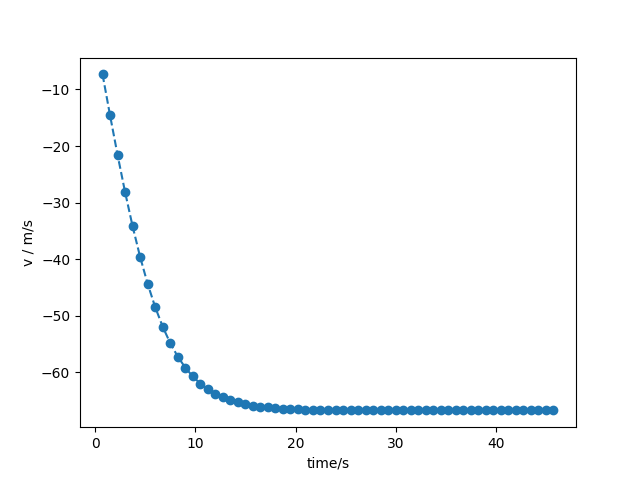

(<matplotlib.text.Text at 0x7f56f368bcf8>,
 <matplotlib.text.Text at 0x7f56f36c7358>)

In [33]:
figure(2)
plot(array(tt), array(vv), 'o--')
xlabel('time/s'), ylabel('v / m/s')

## Implicit ODE with Newton-Raphson
Instead of solving

$$\frac{v_\mathrm{n+1} - v_\mathrm{n}}{h} = -g + kv_\mathrm{n}^2$$

we solve


$$\frac{v_\mathrm{n+1} - v_\mathrm{n}}{h} = -g + kv_\mathrm{n+1}^2$$


We can not solve for $v_\mathrm{n+1}$ analytically anymore and therefore have to solve numerically. We can reshape this as a root-finding problem. With 
$$G(v_\mathrm{n+1}) = v_\mathrm{n+1} - v_\mathrm{n} + h(g - kv_\mathrm{n+1}^2)$$
the task is to find the root of $G(v_\mathrm{n+1})$, which can be done using Newton-Raphson.

As you can see the basic strategy is to put everything on one side,
give it a name $ G(v_{n+1})$, set this function to zero and
solve it by Newton-Raphson. The beauty is that this idea can be easily
expanded to systems of ODEs with many variables. In physics this 
method is for example used for large reaction rate networks involving
thousands of isotopes, solving radiation transfer problems or computing the evolution of stars in spherical symmetry according to the conservation laws of mass, momentum and energy.

In [34]:
# and the derivative
def derivs(f, x, h):
    '''
    Return 1st order numberical derivative
    
    f : function
    x : x value to evaluate derivate
    h : interval in x for derivative
    '''
    
    dfdx = (f(x+h) - f(x))/h
    return dfdx

In [36]:
## setup NR difference equation for one time step to be iterated over
## by finding the root at each iteration and updating the
v = []
t = []
vn = 0      ## velocity at t=0
tt = 0
v.append(vn)
t.append(tt)
dt = 1.5

In [37]:
v

[0]

In [41]:
G = lambda v_np1: -v_np1 + vn + dt*(-g + k*v_np1**2)   ## Not sure why its negative

In [42]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


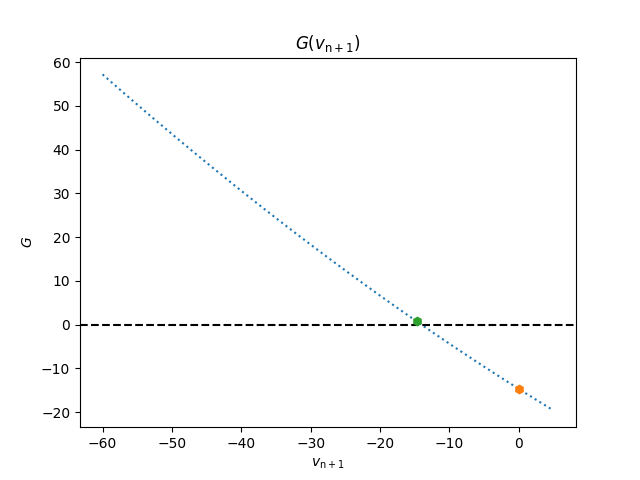

(<matplotlib.text.Text at 0x7f56f35e98d0>,
 <matplotlib.text.Text at 0x7f56f367f358>)

In [43]:
## check how G looks like, what are we trying to find the root of?
close(4); figure(4)

x = linspace(-60, 5)
plot(x, G(x), ':')

axhline(color = 'k', linestyle = 'dashed')

title('$G(v_\mathrm{n+1})$')
xlabel('$v_\mathrm{n+1}$'), ylabel('$G$')

In [44]:
xx = vn
h = 0.01
plot(xx, G(xx), 'h')

In [45]:
## one NR iteration, repeat until satisfactory solution is found
## x is the estimate for v_n+1 and accepted as solution if
## G(xx) < eps1 and delta < eps2, where eps1 and eps2 are
## suitably small limits
x = xx
delta = -G(x)/derivs(G,x,h)
xx = x + delta
print(xx, G(xx), delta)
plot(xx, G(xx), 'h')

-14.700485116010112 0.7136291827420269 -14.700485116010112


In [46]:
## accept solution and advance time
v.append(xx)
tt += dt
t.append(tt)

## new solution becomes old solution
vn = xx
## start new NR iterations

<IPython.core.display.Javascript object>


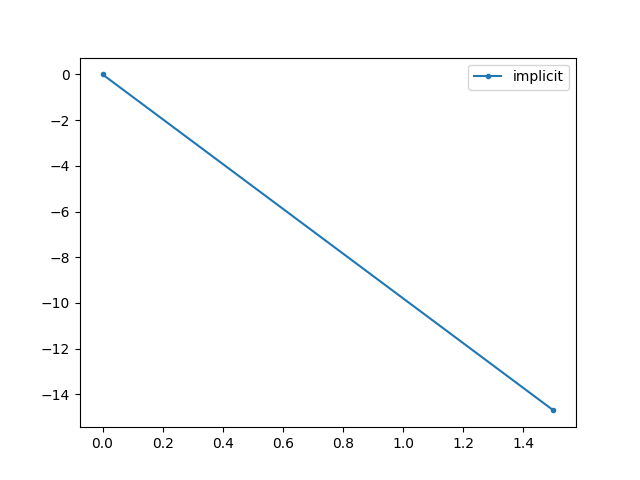

In [47]:
## add implicit solution to fig 2 above
figure(2)
plot(t, v, '.-', label='implicit')
legend()

In [48]:
## initialize again and put in loop
tmax = 200.
while tt < tmax:
    delta = 0.5
    while delta > 0.001:
        x = xx
        delta = -G(x)/derivs(G, x, h)
        xx = x + delta
        print(xx, G(xx))
    v.append(xx)
    tt += dt
    t.append(tt)
    vn = xx

-27.45069556524986 0.5368947163926379
-37.79095944952307 0.35318071745435375
-45.78454391135734 0.21112518369859412
-51.761189629775735 0.11807419965408528
-56.128073551180485 0.06307403527494593
-59.26859551808292 0.03265113536662323
-61.502642007862846 0.01654390380613524
-63.079942764039366 0.008262047254311788
-64.18779044225613 0.004086736351421649
-64.96311775797145 0.0020093228743300884
-65.5043827060552 0.0009846552981800372
-65.88159546148559 0.000482003248161611
-66.14416484505746 0.00023617563731814784
-66.32678220092859 0.00011607839820904076
-66.453719852117 5.7362394456639265e-05
-66.54191926819593 2.858173276631959e-05
-66.60318544777026 1.4408481582073307e-05
-66.6457347549649 7.378590801465634e-06
-66.67528127267919 3.855924196827232e-06
-66.69579667015596 2.0659171644510366e-06
-66.7100404639901 1.13956788805325e-06
-66.71992945684431 6.490509418810575e-07
-66.72679484360911 3.820984293412266e-07
-66.73156100369123 2.3224701095614364e-07
-66.73486976749129 1.453173412

idk